# Caso de Inversión en Finca Raíz para Arriendo en Bogotá

## Enunciado del Caso

Una firma de inversión inmobiliaria desea invertir en propiedades para arriendo en diferentes localidades de Bogotá. El objetivo es maximizar los ingresos mensuales por concepto de arriendo, considerando el presupuesto disponible, las características del mercado en cada localidad y las políticas internas de diversificación de la empresa.

La empresa ha identificado 5 localidades estratégicas: Bosa, Kennedy, Salitre, Suba y Usme. Cada localidad tiene características particulares en términos de rentabilidad mensual por cada millón de pesos invertido, límite máximo de inversión según el inventario disponible, y demanda del mercado.

Tanto el problema como la información del conjunto de datos son ficticios y fueron diseñados a medida para que el problema tuviese sentido y pudiera ser resuelto. Sin embargo, el problema se aproxima a problemas reales que pueden experimentar firmas inmobiliarias en Bogotá y lo realmente importante es la aproximación que se hace mediante el código para resolver este problema. 

Se agregaron algunas gráficas para hacer más entendible el problema.

## Formulación
---

### Conjuntos y Parámetros

#### **Conjuntos**
* $L$: conjunto de localidades en Bogotá donde se puede invertir.

#### **Parámetros**
* $r_l:$ ingreso mensual por arriendo (en miles de pesos) por cada millón de pesos invertido en la localidad $l \in L$
* $m_l:$ presupuesto máximo para invertir en la localidad $l\in L$ (en millones de pesos)
* $P:$ presupuesto total disponible para inversión (en millones de pesos)
* $\alpha:$ porcentaje mínimo de inversión que debe destinarse a localidades premium (Salitre y Suba)
* $\beta:$ porcentaje máximo de inversión permitido en localidades de bajo costo (Bosa y Usme)

### Variables de Decisión
> $x_l:$ monto a invertir (en millones de pesos) en la localidad $l\in L$

### Restricciones

> 1. **Capacidad máxima por localidad**: Cada localidad $l\in L$ tiene un máximo de inventario disponible para inversión $m_l$
>> $x_l \leq m_l, \; \forall l\in L$

> 2. **Presupuesto global**: El presupuesto total para todas las inversiones es de $P$ millones
>> $\sum_{l\in L} x_l \leq P$

> 3. **Diversificación en localidades premium**: Al menos el $\alpha$ (40%) del presupuesto total debe invertirse en localidades premium (Salitre y Suba) para mantener un portafolio balanceado
>> $x_{\text{Salitre}} + x_{\text{Suba}} \geq \alpha \cdot \sum_{l\in L} x_l$

> 4. **Límite en localidades de bajo costo**: Máximo el $\beta$ (30%) del presupuesto puede invertirse en localidades de bajo costo (Bosa y Usme) para controlar el riesgo
>> $x_{\text{Bosa}} + x_{\text{Usme}} \leq \beta \cdot \sum_{l\in L} x_l$

> **Naturaleza de Variables**
>> $x_l\geq 0 , \; \forall l\in L$

### Función Objetivo
> Maximizar el ingreso mensual total por arriendo dado por la inversión en las diferentes localidades.
>> $\max{ \sum_{l\in L} r_l \cdot x_l}$

---

## Implementación en Python

In [1]:
# Importación de librerías
import pulp as lp

# Conjunto de localidades
L = ["Bosa", "Kennedy", "Salitre", "Suba", "Usme"]

# Parámetros

# Ingreso mensual por arriendo (miles de pesos) por cada millón invertido
# Salitre y Suba son zonas premium con mayor rentabilidad
# Kennedy es zona intermedia
# Bosa y Usme son zonas populares con menor rentabilidad pero mayor demanda
r = {
    "Bosa": 45,      # $45,000 mensuales por millón invertido
    "Kennedy": 55,   # $55,000 mensuales por millón invertido
    "Salitre": 75,   # $75,000 mensuales por millón invertido
    "Suba": 70,      # $70,000 mensuales por millón invertido
    "Usme": 40,      # $40,000 mensuales por millón invertido
}

# Presupuesto máximo para invertir en cada localidad (millones de pesos)
# Basado en inventario disponible y oportunidades del mercado
m = {
    "Bosa": 800,     # Mayor inventario disponible
    "Kennedy": 1000, # Localidad grande con mucho inventario
    "Salitre": 600,  # Zona exclusiva, menos inventario
    "Suba": 900,     # Zona amplia con buen inventario
    "Usme": 500,     # Zona en desarrollo, inventario limitado
}

# Presupuesto total disponible (millones de pesos)
P = 2500

# Porcentaje mínimo en localidades premium (Salitre y Suba)
alpha = 0.40  # 40% mínimo

# Porcentaje máximo en localidades de bajo costo (Bosa y Usme)
beta = 0.30  # 30% máximo

### Visualización de Parámetros

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

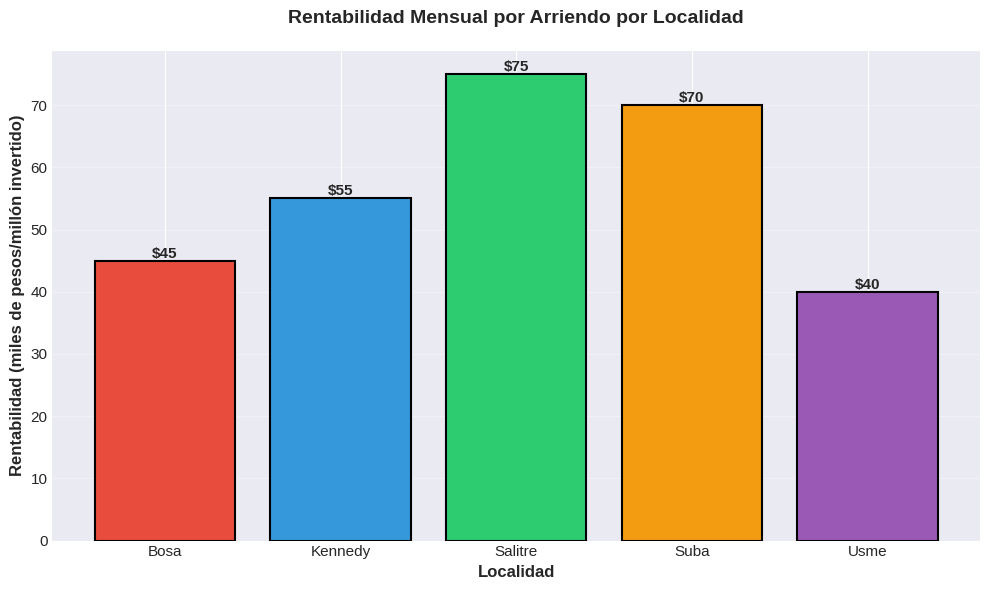

In [3]:
# Gráfico 1: Rentabilidad Mensual por Localidad
fig, ax = plt.subplots(figsize=(10, 6))
localidades = list(r.keys())
rentabilidades = list(r.values())

bars = ax.bar(localidades, rentabilidades, color=colors, edgecolor='black', linewidth=1.5)

# Añadir valores sobre las barras
for i, (bar, val) in enumerate(zip(bars, rentabilidades)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${val:,.0f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Localidad', fontsize=12, fontweight='bold')
ax.set_ylabel('Rentabilidad (miles de pesos/millón invertido)', fontsize=12, fontweight='bold')
ax.set_title('Rentabilidad Mensual por Arriendo por Localidad', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

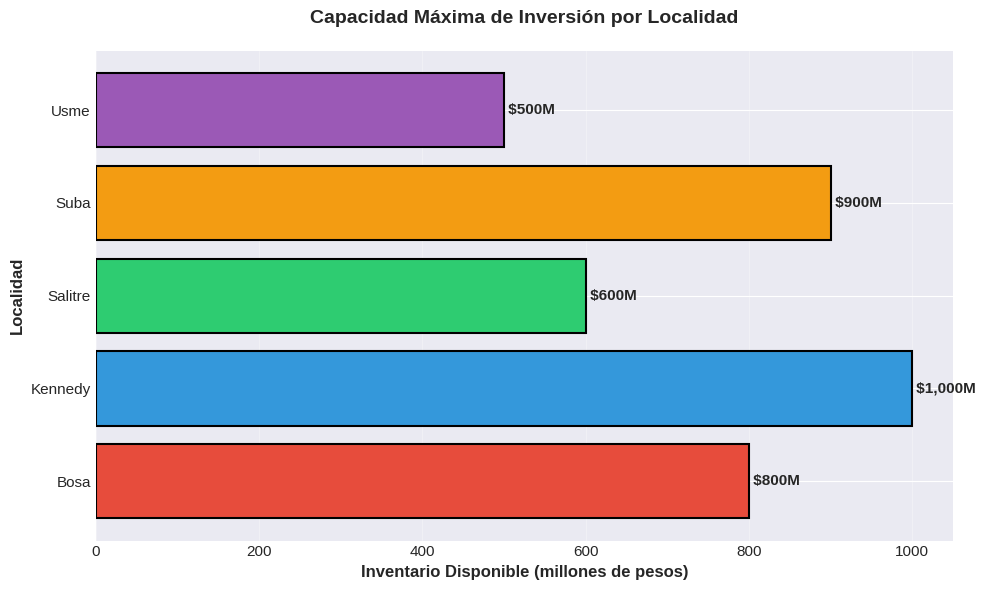

In [4]:
# Gráfico 2: Inventario Disponible por Localidad
fig, ax = plt.subplots(figsize=(10, 6))
inventarios = list(m.values())

bars = ax.barh(localidades, inventarios, color=colors, edgecolor='black', linewidth=1.5)

# Añadir valores al final de las barras
for i, (bar, val) in enumerate(zip(bars, inventarios)):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' ${val:,.0f}M',
            ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_ylabel('Localidad', fontsize=12, fontweight='bold')
ax.set_xlabel('Inventario Disponible (millones de pesos)', fontsize=12, fontweight='bold')
ax.set_title('Capacidad Máxima de Inversión por Localidad', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

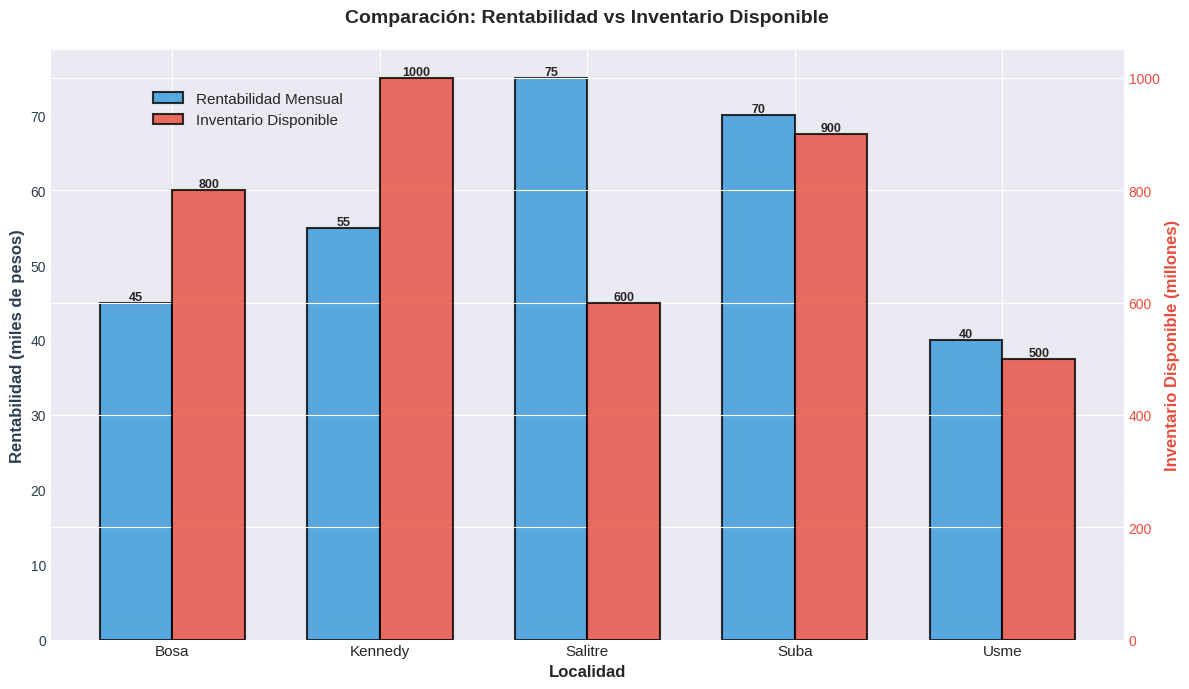

In [5]:
# Gráfico 3: Comparación Rentabilidad vs Inventario
fig, ax1 = plt.subplots(figsize=(12, 7))

x_pos = np.arange(len(localidades))
width = 0.35

# Primer eje Y: Rentabilidad
ax1.set_xlabel('Localidad', fontsize=12, fontweight='bold')
ax1.set_ylabel('Rentabilidad (miles de pesos)', fontsize=12, fontweight='bold', color='#2c3e50')
bars1 = ax1.bar(x_pos - width/2, rentabilidades, width, label='Rentabilidad Mensual',
                color='#3498db', edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.tick_params(axis='y', labelcolor='#2c3e50')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Segundo eje Y: Inventario
ax2 = ax1.twinx()
ax2.set_ylabel('Inventario Disponible (millones)', fontsize=12, fontweight='bold', color='#e74c3c')
bars2 = ax2.bar(x_pos + width/2, inventarios, width, label='Inventario Disponible',
                color='#e74c3c', edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.tick_params(axis='y', labelcolor='#e74c3c')

# Configuración del eje X
ax1.set_xticks(x_pos)
ax1.set_xticklabels(localidades, fontsize=11)

# Añadir valores sobre las barras
for bar, val in zip(bars1, rentabilidades):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{val}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar, val in zip(bars2, inventarios):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{val}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Título y leyendas
plt.title('Comparación: Rentabilidad vs Inventario Disponible', fontsize=14, fontweight='bold', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.88), fontsize=11)
fig.tight_layout()
plt.show()

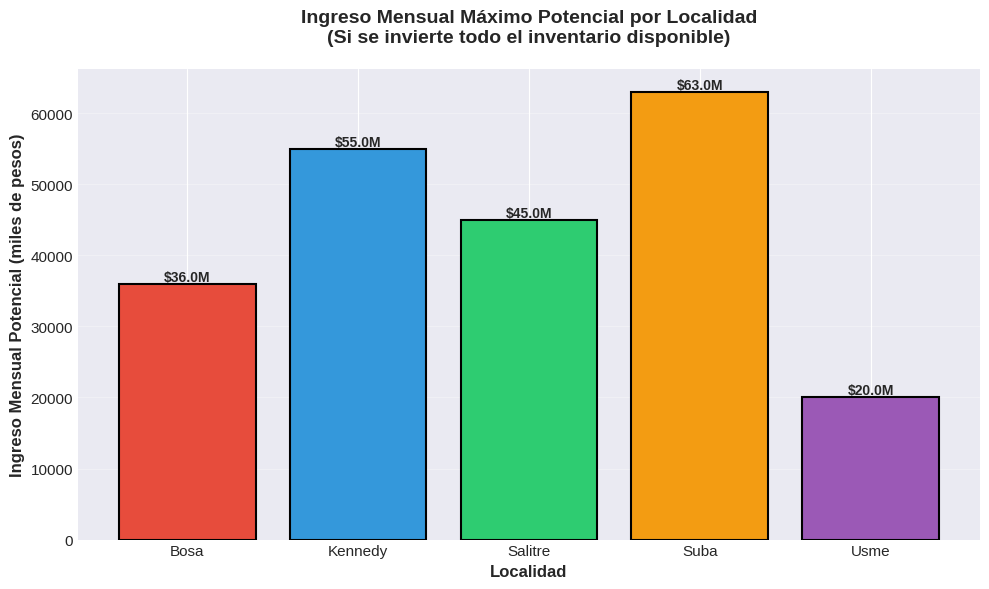


Ingreso mensual máximo potencial por localidad:
Bosa: $36,000 miles = $36,000,000 pesos
Kennedy: $55,000 miles = $55,000,000 pesos
Salitre: $45,000 miles = $45,000,000 pesos
Suba: $63,000 miles = $63,000,000 pesos
Usme: $20,000 miles = $20,000,000 pesos


In [6]:
# Gráfico 4: Potencial de Ingreso Máximo por Localidad
# (Si se invirtiera todo el inventario disponible)
ingreso_maximo = {l: r[l] * m[l] for l in L}

fig, ax = plt.subplots(figsize=(10, 6))
ingresos = list(ingreso_maximo.values())

bars = ax.bar(localidades, ingresos, color=colors, edgecolor='black', linewidth=1.5)

# Añadir valores sobre las barras
for bar, val in zip(bars, ingresos):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${val/1000:.1f}M',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Localidad', fontsize=12, fontweight='bold')
ax.set_ylabel('Ingreso Mensual Potencial (miles de pesos)', fontsize=12, fontweight='bold')
ax.set_title('Ingreso Mensual Máximo Potencial por Localidad\n(Si se invierte todo el inventario disponible)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

print("\nIngreso mensual máximo potencial por localidad:")
for loc in L:
    print(f"{loc}: ${ingreso_maximo[loc]:,.0f} miles = ${ingreso_maximo[loc]*1000:,.0f} pesos")

## Creación del modelo

In [8]:
# Crear el modelo
problema = lp.LpProblem(name="Inversion_Finca_Raiz_Bogota", sense=lp.LpMaximize)

# Variables de decisión
# x: monto a invertir en cada localidad (continua, >= 0)
x = lp.LpVariable.dicts(
    name="inversion",
    indices=L,
    lowBound=0,
    upBound=None,
    cat=lp.LpContinuous
)

## Función objetivo

In [9]:
# Función Objetivo: Maximizar ingresos mensuales por arriendo
problema += lp.lpSum([r[l] * x[l] for l in L]), "Ingresos_Mensuales_Totales"

## Restricciones

Restricción 1: Capacidad máxima por localidad

In [10]:
for l in L:
    problema += x[l] <= m[l], f"R1_Capacidad_Maxima_{l}"

Restricción 2: Presupuesto global

In [11]:
problema += lp.lpSum([x[l] for l in L]) <= P, "R2_Presupuesto_Global"

Restricción 3: Diversificación en localidades premium (Salitre y Suba)

In [12]:
problema += (
    x["Salitre"] + x["Suba"] >= alpha * lp.lpSum([x[l] for l in L]),
    "R3_Inversion_Minima_Premium"
)

Restricción 4: Límite en localidades de bajo costo (Bosa y Usme)

In [13]:
problema += (
    x["Bosa"] + x["Usme"] <= beta * lp.lpSum([x[l] for l in L]),
    "R4_Limite_Bajo_Costo"
)

Invocar solver

In [14]:
# Resolver el problema
problema.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/edwin/.local/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/a568ffb640914363b6f12e5eaa240c8f-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/a568ffb640914363b6f12e5eaa240c8f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 39 RHS
At line 48 BOUNDS
At line 49 ENDATA
Problem MODEL has 8 rows, 5 columns and 20 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-5) rows, 5 (0) columns and 15 (-5) elements
0  Obj -0 Dual inf 285 (5)
1  Obj 163000
Optimal - objective value 163000
After Postsolve, objective 163000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 163000 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):      

1

## Reporte de los resultados

In [15]:
print("=" * 60)
print("RESULTADOS DE LA OPTIMIZACIÓN")
print("=" * 60)
print(f"\nEstado del optimizador: {lp.LpStatus[problema.status]}")
print(f"Ingreso mensual óptimo: ${lp.value(problema.objective):,.0f} miles de pesos")
print(f"Ingreso mensual óptimo: ${lp.value(problema.objective) * 1000:,.0f} pesos\n")

print("=" * 60)
print("INVERSIÓN POR LOCALIDAD")
print("=" * 60)

resultados = {l: lp.value(x[l]) for l in L}
inversion_total = sum(resultados.values())

for localidad in L:
    inversion = resultados[localidad]
    porcentaje = (inversion / inversion_total * 100) if inversion_total > 0 else 0
    ingreso = r[localidad] * inversion
    
    print(f"\n{localidad}:")
    print(f"  - Inversión: ${inversion:,.0f} millones")
    print(f"  - Porcentaje del total: {porcentaje:.1f}%")
    print(f"  - Ingreso mensual: ${ingreso:,.0f} miles = ${ingreso * 1000:,.0f} pesos")

print(f"\n{'=' * 60}")
print(f"INVERSIÓN TOTAL: ${inversion_total:,.0f} millones")
print(f"Utilización del presupuesto: {(inversion_total/P)*100:.1f}%")
print("=" * 60)

# Verificación de restricciones especiales
inv_premium = resultados["Salitre"] + resultados["Suba"]
inv_bajo_costo = resultados["Bosa"] + resultados["Usme"]

print(f"\nInversión en localidades premium (Salitre + Suba): ${inv_premium:,.0f} millones ({(inv_premium/inversion_total*100):.1f}%)")
print(f"Mínimo requerido: {alpha*100:.0f}%")

print(f"\nInversión en localidades bajo costo (Bosa + Usme): ${inv_bajo_costo:,.0f} millones ({(inv_bajo_costo/inversion_total*100):.1f}%)")
print(f"Máximo permitido: {beta*100:.0f}%")

RESULTADOS DE LA OPTIMIZACIÓN

Estado del optimizador: Optimal
Ingreso mensual óptimo: $163,000 miles de pesos
Ingreso mensual óptimo: $163,000,000 pesos

INVERSIÓN POR LOCALIDAD

Bosa:
  - Inversión: $0 millones
  - Porcentaje del total: 0.0%
  - Ingreso mensual: $0 miles = $0 pesos

Kennedy:
  - Inversión: $1,000 millones
  - Porcentaje del total: 40.0%
  - Ingreso mensual: $55,000 miles = $55,000,000 pesos

Salitre:
  - Inversión: $600 millones
  - Porcentaje del total: 24.0%
  - Ingreso mensual: $45,000 miles = $45,000,000 pesos

Suba:
  - Inversión: $900 millones
  - Porcentaje del total: 36.0%
  - Ingreso mensual: $63,000 miles = $63,000,000 pesos

Usme:
  - Inversión: $0 millones
  - Porcentaje del total: 0.0%
  - Ingreso mensual: $0 miles = $0 pesos

INVERSIÓN TOTAL: $2,500 millones
Utilización del presupuesto: 100.0%

Inversión en localidades premium (Salitre + Suba): $1,500 millones (60.0%)
Mínimo requerido: 40%

Inversión en localidades bajo costo (Bosa + Usme): $0 millones 